In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\IRIS 1.csv')


In [10]:
data.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.tail()


,ID,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
data.describe()

,ID,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
data.shape

(150, 6)

In [15]:
count =  data.species.value_counts()
print(count)


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [16]:
data.isnull().sum()

ID              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
lab = data.species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

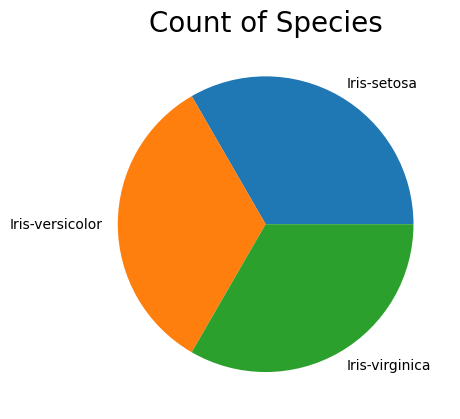

In [18]:
plt.pie(count,labels=lab)
plt.title("Count of Species",fontsize=20)
plt.show()


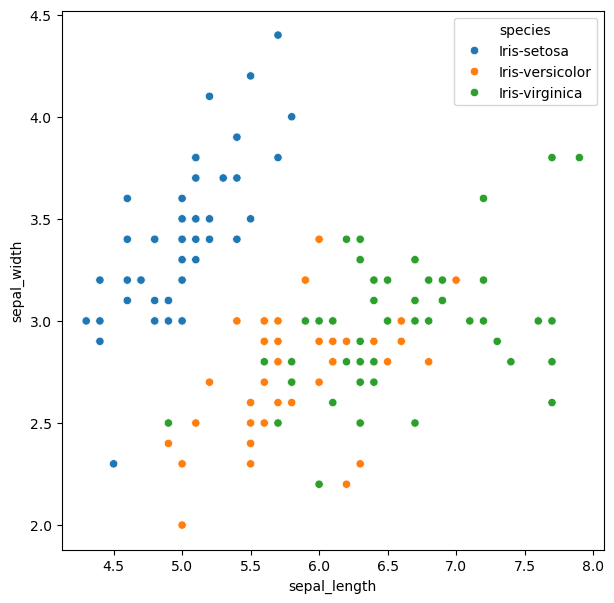

In [19]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="sepal_length",y="sepal_width",data=data,hue="species")
plt.show()

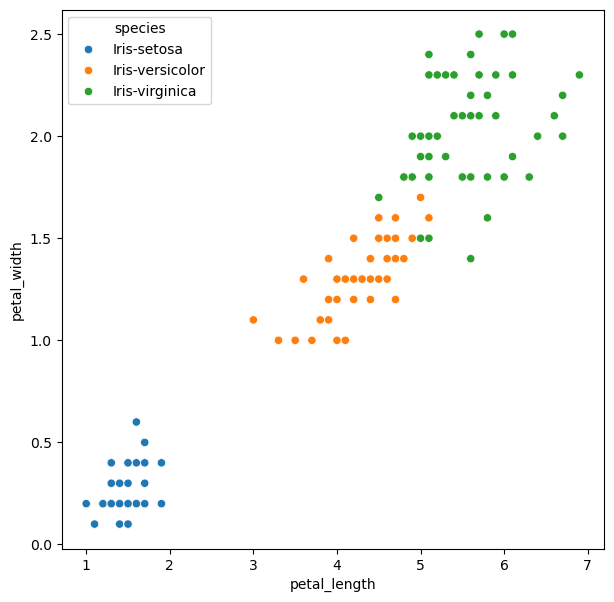

In [20]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="petal_length",y="petal_width",data=data,hue="species")
plt.show()


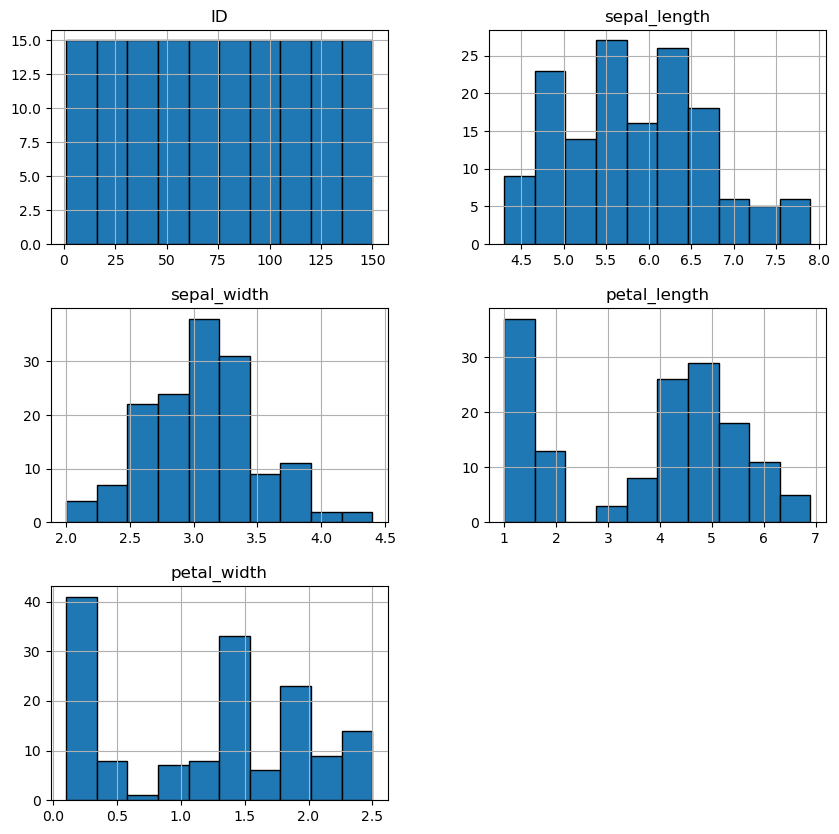

In [21]:
data.hist(edgecolor='black',figsize=(10,10))
plt.show()

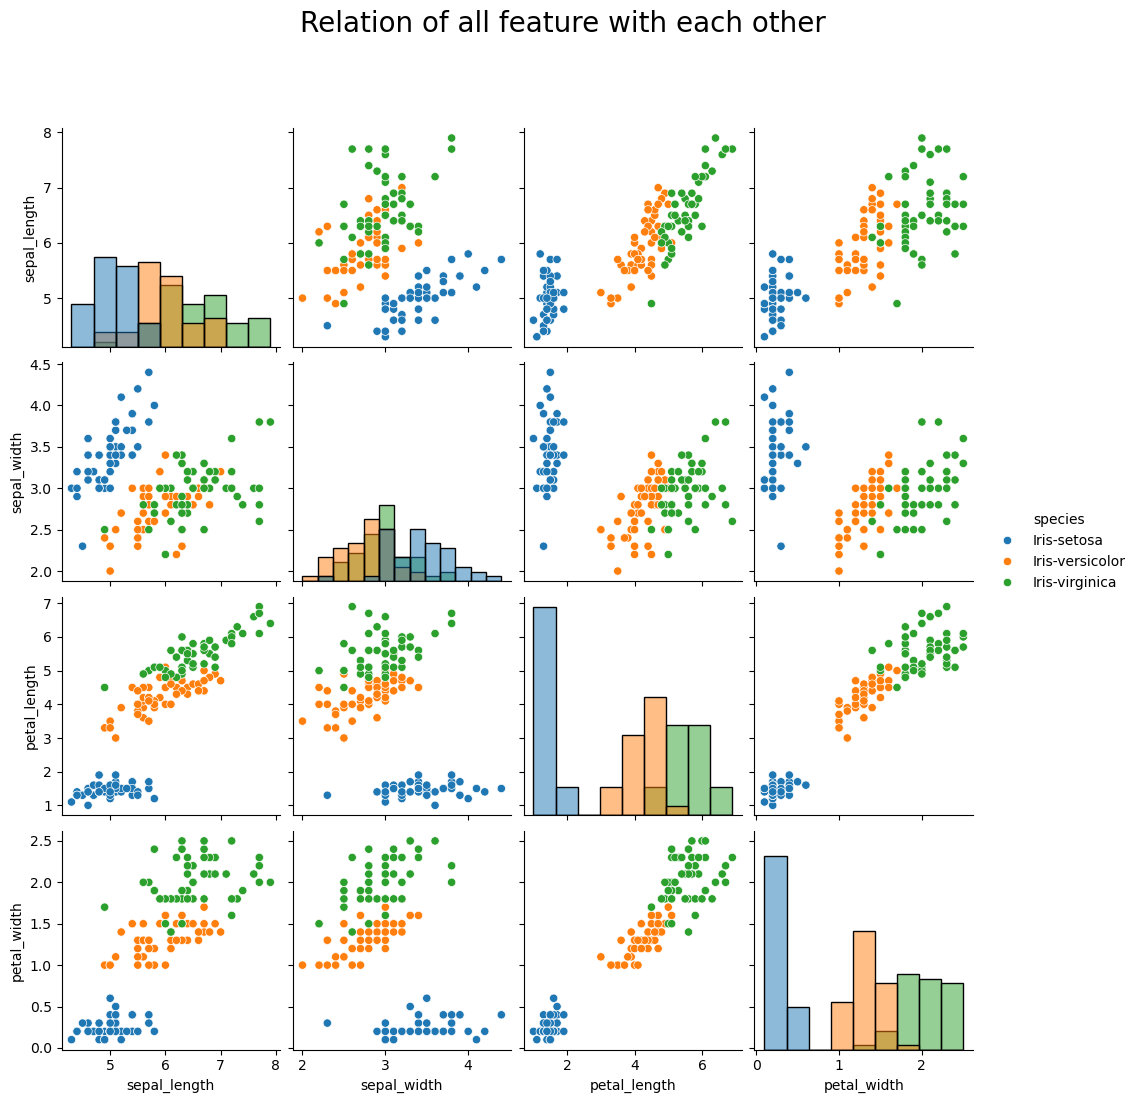

In [22]:
data1 = data.drop("ID",axis=1)
plot=sns.pairplot(data1,hue="species",diag_kind="hist")
plot.fig.suptitle("Relation of all feature with each other",y=1.1,fontsize=20)
plt.show()

In [23]:
# Assuming 'species' column is non-numeric, so we drop it
data_numeric = data.drop(columns=['species'])

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()


<Axes: xlabel='species', ylabel='sepal_width'>

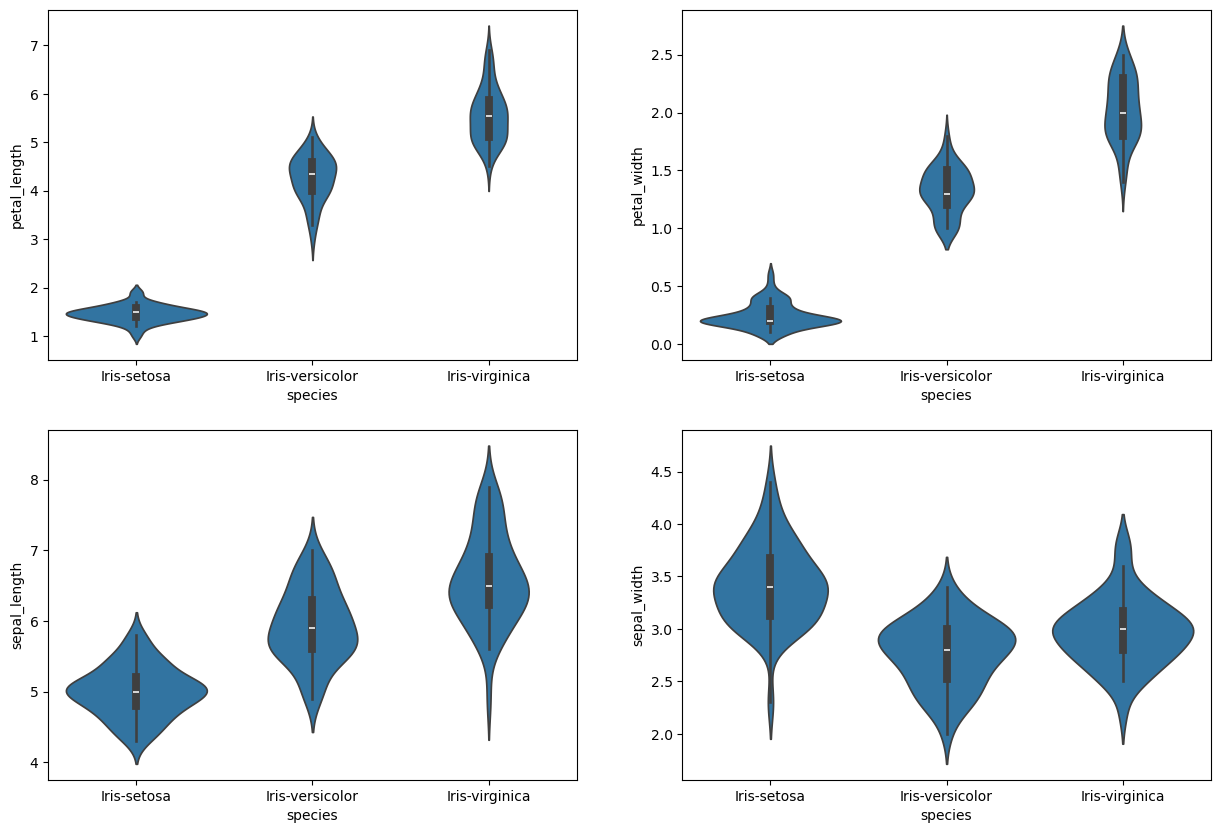

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=data)

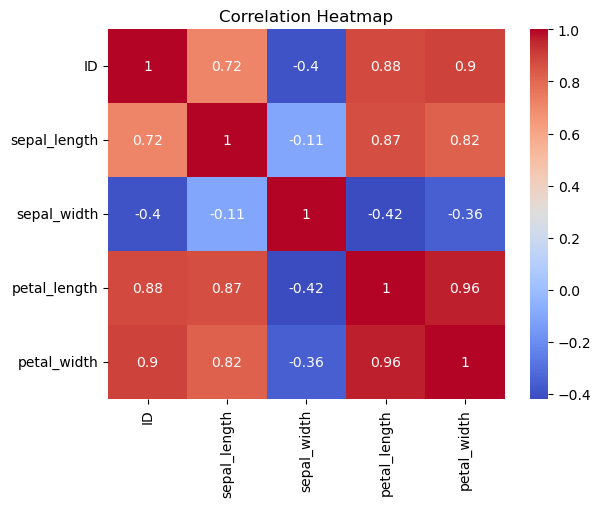

In [25]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\IRIS 1.csv')
data_numeric = data.drop(columns=['species'])
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop(["species","ID"],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
Y = data["species"]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [29]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
model = LogisticRegression(max_iter=1000)

# Now you can use the model for training and prediction


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X and Y are your feature and target variables
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Create an instance of LogisticRegression
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(x_train, y_train)

# Now you can use the model for prediction and evaluation


LogisticRegression(max_iter=1000)

In [35]:

from sklearn.metrics import accuracy_score

# Assuming you have already trained your model and have x_train, y_train available

# Calculate the train accuracy score
train_accuracy = model.score(x_train, y_train)

# Alternatively, you can use the accuracy_score function
# y_train_pred = model.predict(x_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)

print("Train Accuracy:", train_accuracy)


Train Accuracy: 0.9809523809523809


In [36]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model and have x_test, y_test available

# Calculate the accuracy score
test_accuracy = model.score(x_test, y_test)

# Alternatively, you can use the accuracy_score function
# y_pred = model.predict(x_test)
# test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9777777777777777
